# Advanced Classification - Part 2 - Exercises with Results

## Exercise 1

#### Task 1 
##### Load libraries that are used in this module.

#### Result:

In [1]:
import os
import pickle
import matplotlib.pyplot as plt                     
import numpy as np                                    
import pandas as pd
from textwrap import wrap
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from pathlib import Path

#### Task 2

##### Define the directory settings.


#### Result:

In [2]:
# Set 'main_dir' to location of the project folder
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)

/Users/aashika/Desktop/skillsoft-advanced-classification-2022
/Users/aashika/Desktop/skillsoft-advanced-classification-2022/data


#### Task 3
##### Load the clean pickled dataset `bank_clean.sav` and save as `bank`.
##### Print the head of the data.

#### Result:

In [3]:
bank = pickle.load(open(str(data_dir) + "/bank_clean.sav","rb")) 

In [4]:
bank.head()

,age,campaign,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
35577,32,1,-1.8,92.893,-46.2,1.244,5099,0
13950,33,2,1.4,93.918,-42.7,4.963,5228,0
29451,25,5,-1.8,93.075,-47.1,1.405,5099,1
32295,34,1,-1.8,92.893,-46.2,1.313,5099,0
27477,53,7,-0.1,93.200,-42.0,4.021,5196,0


In [5]:
bank.columns

Index(['age', 'campaign', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y'],
      dtype='object')

#### Task 4
##### Select the predictors by dropping variable `y` and save the result to a dataframe `X_ex`.
##### Save the target variable `y` column to `y_ex` variable.
##### Set seed as 1.
##### Split the data into train and test sets and save respective variables to `X_train_ex`, `X_test_ex`, `y_train_ex`, `y_test_ex`.

#### Result:

In [6]:
# Select the predictors and target.
X_ex = bank.drop(['y'], axis = 1)
y_ex = np.array(bank['y'])

# Set the seed to 1.
np.random.seed(1)

# Split into training and test sets.
X_train_ex, X_test_ex, y_train_ex, y_test_ex = train_test_split(X_ex, y_ex, test_size = 0.3)

#### Task 5
##### Create a random forest classifier and save it to `forest_ex` variable.
##### Set random state to 1, number of estimators to 100 and `gini` as the criterion in the model.
##### Fit the classifier to our training data.

#### Result:

In [7]:
forest_ex = RandomForestClassifier(criterion = 'gini', n_estimators = 100, 
                                random_state = 1)

In [8]:
forest_ex.fit(X_train_ex, y_train_ex)

RandomForestClassifier(random_state=1)

#### Task 6
##### Predict on the test data and print the first 5 predictions on the test data.

#### Result:

In [9]:
# Predict on test data.
y_predict_forest_ex = forest_ex.predict(X_test_ex)

# Look at the first few predictions.
print(y_predict_forest_ex[0:5, ])

[1 1 0 1 0]


#### Task 7
##### Print the confusion matrix and save it as `conf_matrix_forest_ex`.
##### Print the accuracy score as `accuracy_forest_ex`.
##### Compute the accuracy on the training data. Why is this accuracy so high?

#### Result:

In [10]:
# Take a look at test data confusion matrix.
conf_matrix_forest_ex = metrics.confusion_matrix(y_test_ex, y_predict_forest_ex)
print(conf_matrix_forest_ex)

[[504  23]
 [ 58  15]]


In [11]:
accuracy_forest_ex = metrics.accuracy_score(y_test_ex, y_predict_forest_ex)
print("Accuracy for random forest on test data: ", accuracy_forest_ex)

Accuracy for random forest on test data:  0.865


In [12]:
# Compute accuracy using training data.
acc_train_forest_ex = forest_ex.score(X_train_ex, y_train_ex)

print ("Train Accuracy:", acc_train_forest_ex)

Train Accuracy: 0.9885714285714285


The train accuracy is high since it is on the training dataset. The accuracy on test data will almost always be lower since the model has not seen this data before.

#### Task 8
##### Create a dictionary named `ex_model_final_dict` to save the accuracy `accuracy_forest_ex`.
##### Convert the dictionary to a dataframe named `ex_model_final`.
#### Result:

In [13]:
# Create a dictionary with accuracy values for our knn model with k = 5.
ex_model_final_dict = {'metrics': ["accuracy"],
               'values':[round(accuracy_forest_ex,4)],
                'model':['random_forest']}
ex_model_final = pd.DataFrame(data = ex_model_final_dict)
print(ex_model_final)

    metrics  values          model
0  accuracy   0.865  random_forest


#### Task 9
##### Print the feature importance graph and print the top 10 important features in our random forest model.

#### Result:

Text(0.5, 0, 'Relative Importance')

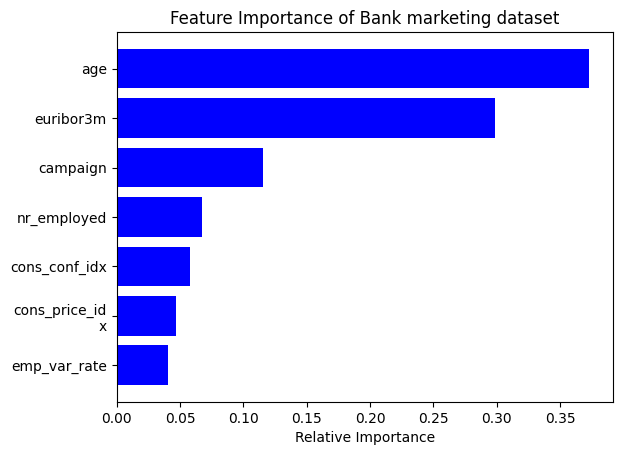

In [14]:
bank_features = bank.drop('y', axis = 1)

features_ex = bank_features.columns
importances_ex = forest_ex.feature_importances_
indices_ex = np.argsort(importances_ex)[::-1]
top_indices_ex = indices_ex[0:10][::-1]

plt.figure(1)
plt.title('Feature Importance of Bank marketing dataset')
plt.barh(range(len(top_indices_ex)), importances_ex[top_indices_ex], color = 'b', align = 'center')
labels = features_ex[top_indices_ex]
labels = [ '\n'.join(wrap(l,13)) for l in labels ]
plt.yticks(range(len(top_indices_ex)), labels)
plt.xlabel('Relative Importance')

## Exercise 2

#### Task 1

##### Create a gradient boosting classifier as `gbm_ex` with number of estimators set to 100, learning rate set to 1, max depth set to 1, and random state set to 1.
##### Fit the model to our training data.

#### Result:

In [15]:
# Save the parameters we will be using for our gradient boosting classifier.
gbm_ex = GradientBoostingClassifier(n_estimators = 100, 
                                    learning_rate = 1, 
                                    max_depth = 1,  
                                    random_state = 1)

In [16]:
# Fit the saved model to your training data.
gbm_ex.fit(X_train_ex, y_train_ex)

GradientBoostingClassifier(learning_rate=1, max_depth=1, random_state=1)

#### Task 2
##### Predict on the test data using our gbm classifier.
##### Print the first 5 predicted values.

#### Result:

In [17]:
# Predict on test data.
predicted_values_gbm_ex = gbm_ex.predict(X_test_ex)
print(predicted_values_gbm_ex[0:5,])

[0 0 0 0 0]


#### Task 3
##### Print the confusion matrix and accuracy score on the test data.
##### Print the training accuracy of gbm model.

#### Result:

In [18]:
# Take a look at test data confusion matrix.
conf_matrix_boosting_ex = metrics.confusion_matrix(y_test_ex, predicted_values_gbm_ex)
print(conf_matrix_boosting_ex)

[[521   6]
 [ 55  18]]


In [19]:
# Compute test model accuracy score.
accuracy_gbm_ex = metrics.accuracy_score(y_test_ex, predicted_values_gbm_ex)
print('Accuracy of gbm on test data: ', accuracy_gbm_ex)

Accuracy of gbm on test data:  0.8983333333333333


In [20]:
# Compute accuracy using training data.
train_accuracy_gbm_ex = gbm_ex.score(X_train_ex, y_train_ex)

print ("Train Accuracy:", train_accuracy_gbm_ex)

Train Accuracy: 0.8892857142857142


#### Task 4
##### Print the feature importance graph and print top 10 important predictors.
#### Result:

Text(0.5, 0, 'Relative Importance')

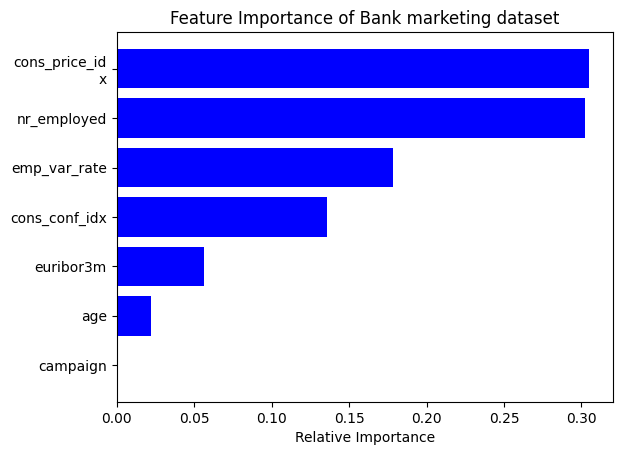

In [21]:
bank_features = bank.drop('y', axis = 1)

features_ex = bank_features.columns
importances_ex = gbm_ex.feature_importances_
indices_ex = np.argsort(importances_ex)[::-1]
top_indices_ex = indices_ex[0:10][::-1]

plt.figure(1)
plt.title('Feature Importance of Bank marketing dataset')
plt.barh(range(len(top_indices_ex)), importances_ex[top_indices_ex], color = 'b', align = 'center')
labels = features_ex[top_indices_ex]
labels = [ '\n'.join(wrap(l,13)) for l in labels ]
plt.yticks(range(len(top_indices_ex)), labels)
plt.xlabel('Relative Importance')

#### Task 5 
##### Add the gbm accuracy score in the dataset `ex_model_final` to compare accuracies. Save as `ex_model_final_rf_gbm`.


#### Result:

In [22]:
# Add the gbm model to our dataframe.
ex_model_final_rf_gbm = ex_model_final.append({'metrics' : "accuracy" , 
                                                'values' : round(accuracy_gbm_ex,4),
                                                'model':'gbm' } , 
                                                ignore_index = True)
print(ex_model_final_rf_gbm)

    metrics  values          model
0  accuracy  0.8650  random_forest
1  accuracy  0.8983            gbm
